# Load mapped read-ends and generate a matrix

We read now each mapped read-ends in the map files and extact the ones that are uniquely mapped. For each of these uniquely mapped read-ends, we store:
  - The strand
  - The genomic location (most upstream position is reported for both sequences mapped in forward and reverse strand)
  - The chromosome
  - The sequence itself
  - The **restriction enzyme fragment** on which it is located
  
This information will be used to filter the reads and, finally, to construct the interaction matrix. Above we show the same analysis done for the fragment-based and iterative mapping strategies.

### Extract uniquely mapped reads

In [1]:
# replicate and enzyme used
cell = 'mouse_B'  # or mouse_PSC
rep = 'rep1'  # or rep2

_Note: the execution of this notebook should be repeated for each of the 4 replicates_

#### Load genomic sequence to map restriction sites

In [2]:
from pytadbit.parsers.genome_parser import parse_fasta

In [3]:
genome_seq = parse_fasta('genome/Mus_musculus-GRCm38.p6/Mus_musculus-GRCm38.p6.fa')

Loading cached genome


In [4]:
from pytadbit.parsers.map_parser import parse_map

### Iterative mapping results

In case we haven't stored the location of each of the reads we could load them as follow:

In [5]:
maps1 = [('results/iterativ/{0}_{1}/01_mapping/mapped_{0}_{1}_r1/'
          '{0}_{1}_1.fastq_full_1-{2}.map').format(cell, rep, i) 
         for i in range(25, 80, 10)]

maps2 = [('results/iterativ/{0}_{1}/01_mapping/mapped_{0}_{1}_r2/'
          '{0}_{1}_2.fastq_full_1-{2}.map').format(cell, rep, i) 
         for i in range(25, 80, 10)]

Load all reads, and check if they are uniquely mapped. The Result is stored in two separate tab-separated-values (tsv) files that will contain the essential information of each read-end

In [6]:
! mkdir -p results/iterativ/$cell\_$rep/02_parsing

In [7]:
parse_map(maps1, maps2,
          'results/iterativ/{0}_{1}/02_parsing/reads1_{0}_{1}.tsv'.format(cell, rep),
          'results/iterativ/{0}_{1}/02_parsing/reads2_{0}_{1}.tsv'.format(cell, rep),
          genome_seq=genome_seq, re_name='MboI', verbose=True)

Searching and mapping RE sites to the reference genome
Found 6669655 RE sites
Loading read1
loading file: results/iterativ/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r1/mouse_B_rep1_1.fastq_full_1-25.map
loading file: results/iterativ/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r1/mouse_B_rep1_1.fastq_full_1-35.map
loading file: results/iterativ/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r1/mouse_B_rep1_1.fastq_full_1-45.map
loading file: results/iterativ/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r1/mouse_B_rep1_1.fastq_full_1-55.map
loading file: results/iterativ/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r1/mouse_B_rep1_1.fastq_full_1-65.map
loading file: results/iterativ/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r1/mouse_B_rep1_1.fastq_full_1-75.map
Merge sort....................................................................................
Getting Multiple contacts
Loading read2
loading file: results/iterativ/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r2/mouse_B_rep1_2.fa

({0: {1: 69012817, 2: 4693142, 3: 2552881, 4: 1982032, 5: 1225598, 6: 1031718},
  1: {1: 68026433,
   2: 4866307,
   3: 2558036,
   4: 2103111,
   5: 1271540,
   6: 1153164}},
 {0: {0: 80498187}, 1: {0: 79978590}})

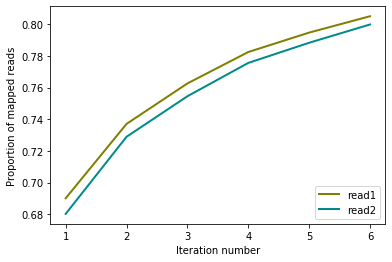

In [8]:
from pytadbit.mapping.analyze import plot_iterative_mapping

total_reads = 100000000

lengths = plot_iterative_mapping(
    'results/iterativ/{0}_{1}/02_parsing/reads1_{0}_{1}.tsv'.format(cell, rep), 
    'results/iterativ/{0}_{1}/02_parsing/reads2_{0}_{1}.tsv'.format(cell, rep), 
    total_reads)

### Fragment-based mapping results

In [9]:
! mkdir -p results/fragment/$cell\_$rep/02_parsing

In [10]:
maps1 = [('results/fragment/{0}_{1}/01_mapping/mapped_{0}_{1}_r1/'
          '{0}_{1}_1.fastq_full_1-end.map').format(cell, rep),
         ('results/fragment/{0}_{1}/01_mapping/mapped_{0}_{1}_r1/'
          '{0}_{1}_1.fastq_frag_1-end.map').format(cell, rep)]

maps2 = [('results/fragment/{0}_{1}/01_mapping/mapped_{0}_{1}_r2/'
          '{0}_{1}_2.fastq_full_1-end.map').format(cell, rep),
         ('results/fragment/{0}_{1}/01_mapping/mapped_{0}_{1}_r2/'
          '{0}_{1}_2.fastq_frag_1-end.map').format(cell, rep)]

In [11]:
parse_map(maps1, maps2,
          'results/fragment/{0}_{1}/02_parsing/reads1_{0}_{1}.tsv'.format(cell, rep), 
          'results/fragment/{0}_{1}/02_parsing/reads2_{0}_{1}.tsv'.format(cell, rep), 
          genome_seq=genome_seq, re_name='MboI', verbose=True)

Searching and mapping RE sites to the reference genome
Found 6669655 RE sites
Loading read1
loading file: results/fragment/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r1/mouse_B_rep1_1.fastq_full_1-end.map
loading file: results/fragment/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r1/mouse_B_rep1_1.fastq_frag_1-end.map
Merge sort...........................................................................................
Getting Multiple contacts
Loading read2
loading file: results/fragment/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r2/mouse_B_rep1_2.fastq_full_1-end.map
loading file: results/fragment/mouse_B_rep1/01_mapping/mapped_mouse_B_rep1_r2/mouse_B_rep1_2.fastq_frag_1-end.map
Merge sort........................................................................................
Getting Multiple contacts


({0: {1: 64750569, 2: 25664719}, 1: {1: 61548041, 2: 26467447}},
 {0: {1: 8157782, 0: 74098430, 2: 431}, 1: {0: 71100363, 1: 8456843, 2: 479}})

In [12]:
reads1 = 'results/fragment/{0}_{1}/02_parsing/reads1_{0}_{1}.tsv'.format(cell, rep)
reads2 = 'results/fragment/{0}_{1}/02_parsing/reads2_{0}_{1}.tsv'.format(cell, rep)

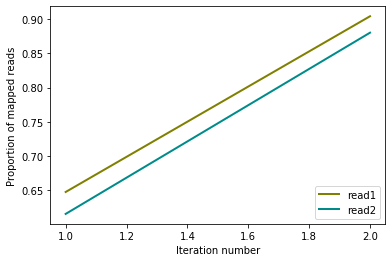

In [13]:
from pytadbit.mapping.analyze import plot_iterative_mapping

total_reads = 100000000

lengths = plot_iterative_mapping(reads1, reads2, total_reads)

_Note: From now on we are going to focus only on the results of the __fragment based mapping__._

### Keep only uniquely mapped reads pairs

In [14]:
from pytadbit.mapping import get_intersection

In [15]:
! mkdir -p results/fragment/$cell\_$rep/03_filtering

In [16]:
reads = 'results/fragment/{0}_{1}/03_filtering/reads12_{0}_{1}.tsv'.format(cell, rep)

In [17]:
get_intersection(reads1, reads2, reads, verbose=True)

Getting intersection of reads 1 and reads 2:
 
  .......... .......... .......... .......... ..........     50 milion reads
  .......... .......... .......... .......... ...
Found 68707083 pair of reads mapping uniquely
Sorting each temporary file by genomic coordinate
    1025/1025 sorted files
Removing temporary files...


(68707083, {2: 9191166, 3: 154507, 4: 17})

# Quality check of the Hi-C experiment

## Interaction count vs. genomic separation!

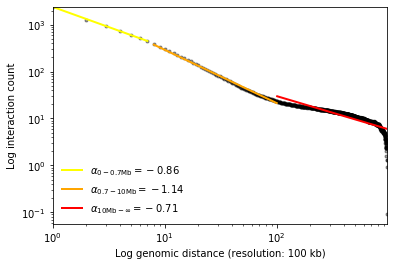

((-0.8597345093043444, 7.77896435141178, -0.9993659328855855),
 (-1.1357021175965485, 8.287957073239085, -0.9982246432365471),
 (-0.7085449034953684, 6.662855682899386, -0.8479147001712137))

In [18]:
from pytadbit.mapping.analyze import plot_distance_vs_interactions

plot_distance_vs_interactions(reads, resolution=100000, max_diff=1000, show=True)

According to the fractal globule model <a name="ref-1"/>[(Mirny, 2011)](#cite-Mirny2011) the slope between 700 kb and 10 Mb should be around -1 in log scale

### Note: decay by chromosome

With a bit of coding we can also extract the decay by chromosome.

Although the level of interaction changes depending on the chromosome (and the number of chromosomes, cf: chrX), the slope is relatively constant, and in very few occasions we may observe line crossings.

Differences in the slopes observed between chromosomes or conditions relates to gains or losses of close or long range interactions <a name="ref-2"/>[(Kojic et al. 2018)](#cite-Kojic2018).

In [19]:
from pytadbit import load_hic_data_from_reads
from matplotlib import pyplot as plt
import numpy as np

In [20]:
hic_data = load_hic_data_from_reads(reads, resolution=100000)

In [21]:
min_diff  = 1
max_diff  = 200

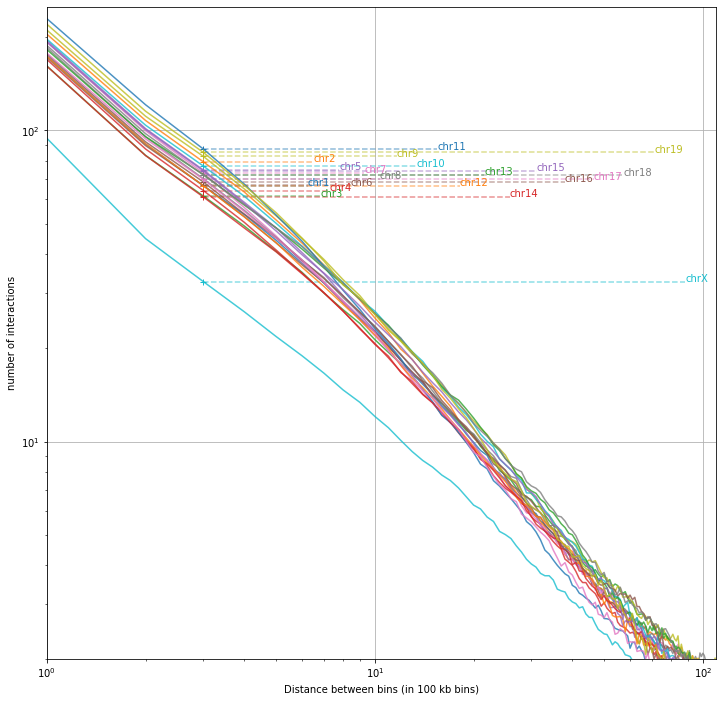

In [22]:
plt.figure(figsize=(12, 12))
for cnum, c in enumerate(hic_data.chromosomes):
    if c in ['chrY','chrMT']:
        continue
    dist_intr = []
    for diff in range(min_diff, min((max_diff, 1 + hic_data.chromosomes[c]))):
        beg, end = hic_data.section_pos[c]
        dist_intr.append([])
        for i in range(beg, end - diff):
            dist_intr[-1].append(hic_data[i, i + diff])
    mean_intrp = []
    for d in dist_intr:
        if len(d):
            mean_intrp.append(float(np.nansum(d)) / len(d))
        else:
            mean_intrp.append(0.0)
    xp, yp = range(min_diff, max_diff), mean_intrp
    x = []
    y = []
    for k in range(len(xp)):
        if yp[k]:
            x.append(xp[k])
            y.append(yp[k])
    l = plt.plot(x, y, '-', label=c, alpha=0.8)
    plt.hlines(mean_intrp[2], 3, 5.25 + np.exp(cnum / 4.3), color=l[0].get_color(), 
               linestyle='--', alpha=0.5)
    plt.text(5.25 + np.exp(cnum / 4.3), mean_intrp[2], c, color=l[0].get_color())
    plt.plot(3, mean_intrp[2], '+', color=l[0].get_color())
plt.xscale('log')
plt.yscale('log')
plt.ylabel('number of interactions')
plt.xlabel('Distance between bins (in 100 kb bins)')
plt.grid()
plt.ylim(2, 250)
_ = plt.xlim(1, 110)

_Note: these __decay are computed on the raw data__, and although the slopes may not change dramatically, it is a __good practice to repeate this analysis and interpret the results also once the data are normalized__._

## Coverage per bin

In an ideal situation, the number of reads per bin along the genome is expected to be homogeneous across the genome. However, PCR artifacts (see for example the middle of the chromosome 3 below) or variations in the distributions of GC content, mappability or the number of RE cut-sites along the genome can cause heterogeneity. In the following sections, we will discuss how to correct for these sources of heterogeneity. 

In [23]:
from pytadbit.mapping.analyze import plot_genomic_distribution

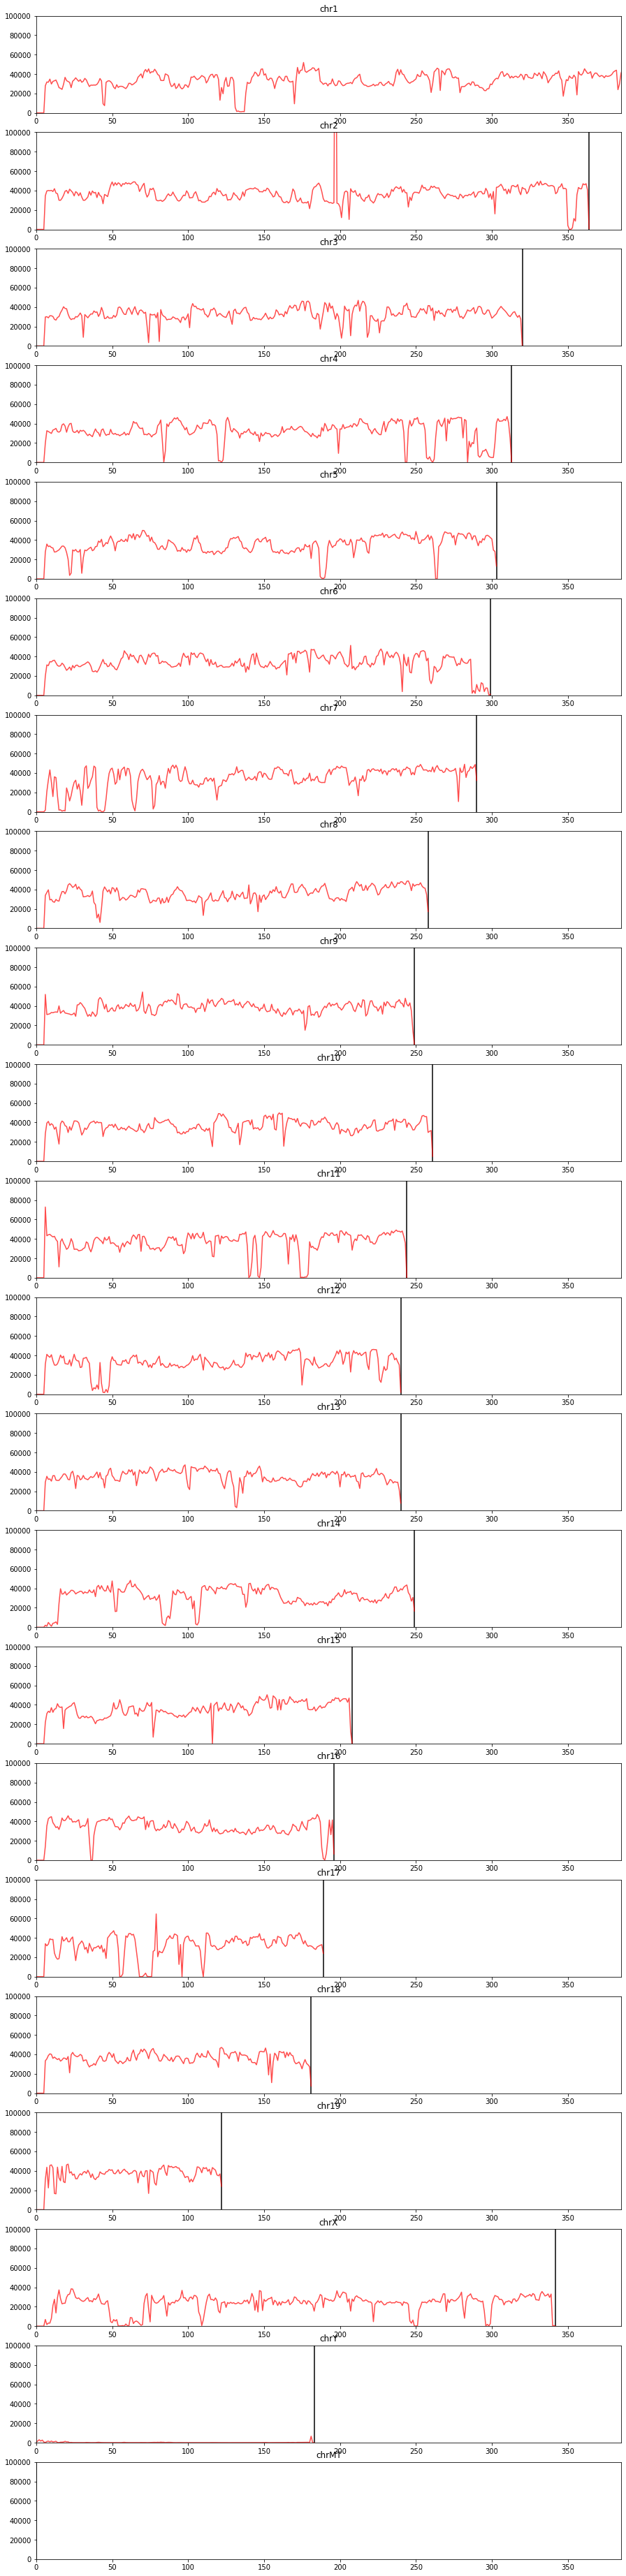

<Figure size 432x288 with 0 Axes>

In [24]:
plot_genomic_distribution(reads, resolution=500000, ylim=(0, 100000), show=True)
plt.tight_layout()

## First Hi-C map

The plot bellow is probably the most informative, in order to infer the quality of an Hi-C experiment. This plot shows on the left part:
- The histogram of the interaction counts.
- The interaction count as a function of the genomic distance between the interacting sequences.
- Some statistics on the specificity of the interaction: (i) the total number of interactions; (ii) the cis-to-trans ratio (expected to be at least between 50 or 60% in mammals), (iii and iv) the minimum and the maximum values of the ineraction matrix.

and on the right part:

- The interaction matrix.
- The first 3 eigenvectors of the interaction matrix are shown on top of the matrix itself.

*__Note__: The first 3 eigenvectors of the interaction matrix highlight the principal structural features of the matrix.  In the raw matrix shown here, we can see, for instance, that here the maxima of the first eigenvector seem to be correlated with the presence of low-coverage bins.*


In [25]:
from pytadbit.mapping.analyze import hic_map

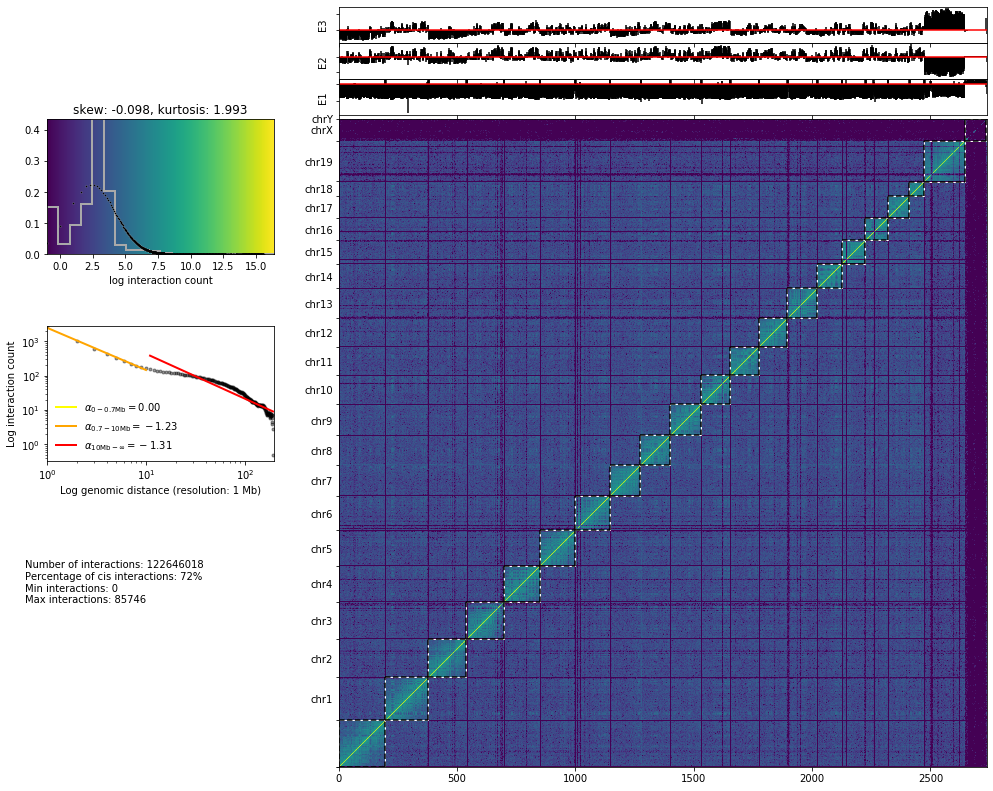

In [26]:
hic_map(reads, resolution=1000000, show=True, cmap='viridis')

## Insert size

From the reads that are mapped in a single RE fragment we can infer the average insert size:

In [27]:
from pytadbit.mapping.analyze import insert_sizes

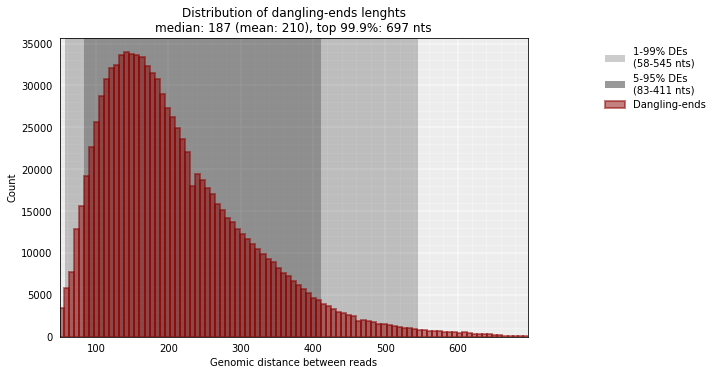

[187.0, 697.0]

In [28]:
insert_sizes(reads, show=True, nreads=1000000)

The median size of the sequenced DNA fragments is thus 187 nt.

*__Note__: This distribution is usually peaked at smaller values than the one measured experimentally (with a Bioanalyzer for example). This difference is due in part to the fact that, here, we are only measuring dangling-ends that may be, on average, shorter than other reads.*

## Distance between mapped read-ends classified by their orientation

The following function in TADbit allows to measure the size of the sequenced fragment. If we set the parameter `valid-pairs` to `False`, we will look only at the interactions captured within RE fragments (similarly to the `insert_sizes` function above):

In [29]:
from pytadbit.mapping.analyze import  plot_strand_bias_by_distance

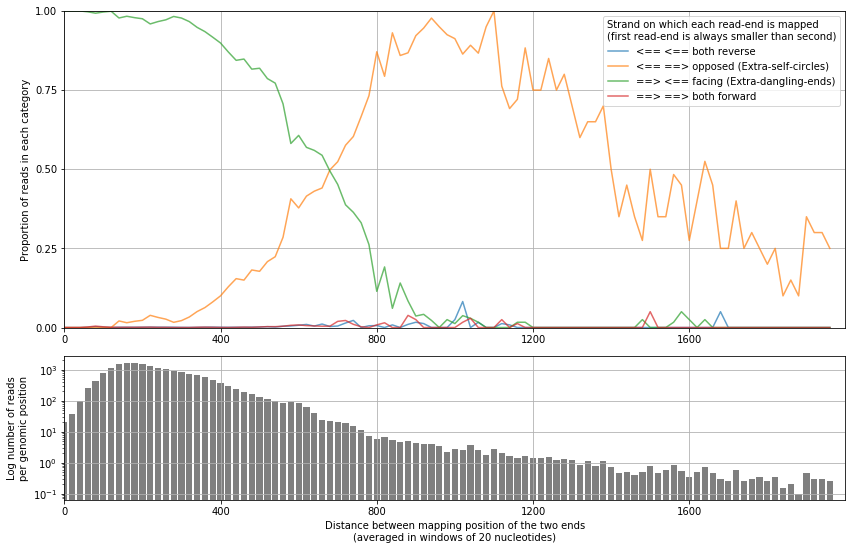

In [30]:
plot_strand_bias_by_distance(reads, valid_pairs=False, full_step=None, nreads=20000000)

This function separates each read-end pair into 4 categories depending of the orientation of the strand in which each maps.

Having a look at the minimum distance from which the orientation of the mapped read-ends is even, is also useful for the interpretation of the results and for the definition of filters.

/home/dcastillo/miniconda2/envs/py3_tadbit/lib/python3.7/site-packages/pytadbit/mapping/analyze.py:1638: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axRb.set_ylim(0, max(sum_dirs) * 1.1)


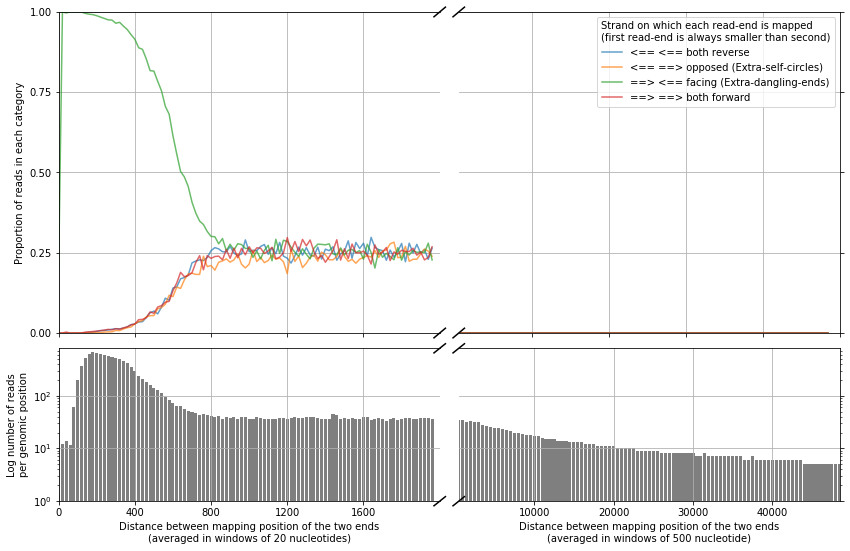

In [31]:
plot_strand_bias_by_distance(reads, nreads=20000000)

We can see that when the distance between the mapped read-ends is larger than ~1 kb, the orientation is even (25% each category). Meaning that bellow this size interactions are very likely to be extra-dangling-ends or re-ligated fragments, with no useful structural information.

<!--bibtex
@article{Mirny2011,
abstract = {The fractal globule is a compact polymer state that emerges during polymer condensation as a result of topological constraints which prevent one region of the chain from passing across another one. This long-lived intermediate state was introduced in 1988 (Grosberg et al. 1988) and has not been observed in experiments or simulations until recently (Lieberman-Aiden et al. 2009). Recent characterization of human chromatin using a novel chromosome conformational capture technique brought the fractal globule into the spotlight as a structural model of human chromosome on the scale of up to 10 Mb (Lieberman-Aiden et al. 2009). Here, we present the concept of the fractal globule, comparing it to other states of a polymer and focusing on its properties relevant for the biophysics of chromatin. We then discuss properties of the fractal globule that make it an attractive model for chromatin organization inside a cell. Next, we connect the fractal globule to recent studies that emphasize topological constraints as a primary factor driving formation of chromosomal territories. We discuss how theoretical predictions, made on the basis of the fractal globule model, can be tested experimentally. Finally, we discuss whether fractal globule architecture can be relevant for chromatin packing in other organisms such as yeast and bacteria.},
author = {Mirny, Leonid a},
doi = {10.1007/s10577-010-9177-0},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Mirny - 2011 - The fractal globule as a model of chromatin architecture in the cell.pdf:pdf},
issn = {1573-6849},
journal = {Chromosome research : an international journal on the molecular, supramolecular and evolutionary aspects of chromosome biology},
keywords = {Biophysics,Chromatin,Chromatin: ultrastructure,Chromosomes, Human,Fractals,Humans,Models, Molecular,Protein Conformation,Protein Folding},
mendeley-groups = {Research articles,projects/FEBS{\_}review/modeling{\_}perspectives},
month = {jan},
number = {1},
pages = {37--51},
pmid = {21274616},
title = {{The fractal globule as a model of chromatin architecture in the cell.}},
url = {http://www.pubmedcentral.nih.gov/articlerender.fcgi?artid=3040307{\&}tool=pmcentrez{\&}rendertype=abstract},
volume = {19},
year = {2011}
}
-->

### References

<a name="cite-Mirny2011"/><sup>[^](#ref-1) </sup>Mirny, Leonid a. 2011. _The fractal globule as a model of chromatin architecture in the cell._. [URL](http://www.pubmedcentral.nih.gov/articlerender.fcgi?artid=3040307{\&}tool=pmcentrez{\&}rendertype=abstract)

<a name="cite-Kojic2018"/><sup>[^](#ref-2) </sup>Aleksandar Kojic, Ana Cuadrado, Magali De Koninck, Daniel Giménez-Llorente, Miriam Rodríguez-Corsino, Gonzalo Gómez-López, François Le Dily, Marc A. Marti-Renom & Ana Losada.  _Distinct roles of cohesin-SA1 and cohesin-SA2 in 3D chromosome organization._ Nature Structural & Molecular Biologyvolume 25, pages496–504 (2018) [URL](https://www.nature.com/articles/s41594-018-0070-4) 
